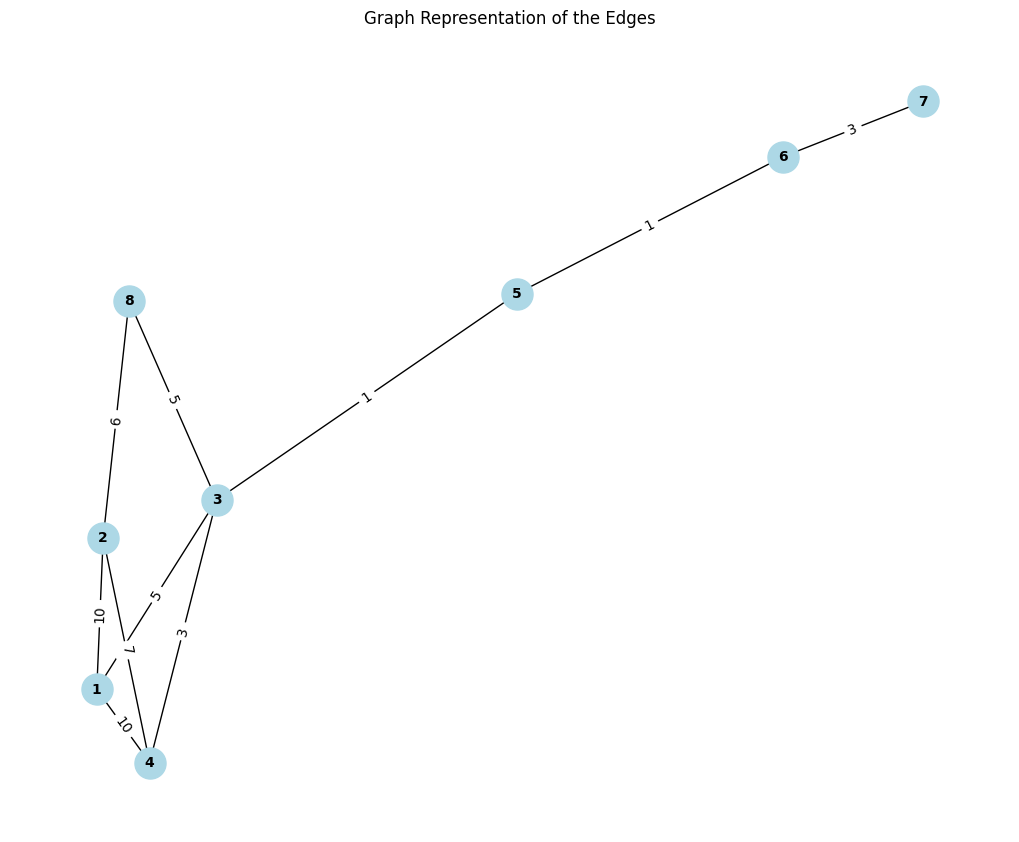

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# 定義邊
edges = [
    (1, 4, 10), (1, 2, 10), (1, 3, 5), 
    (2, 4, 7), (3, 4, 3), (3, 8, 5),
    (3, 5, 1), (5, 6, 1), (7, 6, 3), (8, 2, 6)
]

# 創建圖
G = nx.Graph()
for u, v, weight in edges:
    G.add_edge(u, v, weight=weight)

# 畫圖
pos = nx.spring_layout(G)  # 節點位置
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_weight='bold')
edge_labels = {(u, v): f"{d['weight']}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Graph Representation of the Edges")
plt.show()


這是input
"8 10 4
PLACE 2 1
PLACE 4 1
PLACE 7 1
PLACE 8 1
EDGE 1 4 10 9
EDGE 1 2 10 5
EDGE 1 3 5 2
EDGE 2 4 7 4
EDGE 3 4 3 1
EDGE 3 8 5 2
EDGE 3 5 1 2
EDGE 5 6 1 2
EDGE 7 6 3 2
EDGE 8 2 6 1

10
Order 1 1 2
Order 2 3 2
Drop 1 3
Drop 2 2
Complete 1
Order 3 4 1
Complete 2
Drop 3 2
Complete 3
Order 4 4 1"

目前的output
"Order 1 distance: 15
No Way Home
Order 2 is waiting.
Order 3 from: 4
Order 2 is waiting.
Order 3 distance: 7
Order 2 is waiting.
Order 4 from: 4"
第一行Order 1 1 2找尋司機到位置1取餐，找到位置2司機，印出訂單1的司機位置(Order 1 from 2)，但還不知道送到所以訂單等待

下一行Order 2 3 2找尋司機到位置3取餐，會找到位置7的司機，但是因為位置7的司機要將餐點送往位置2所走的路徑的交通量已經被訂單1所佔用(位置7送餐路徑會遇到EDGE 3 4 3 1這個路徑，他交通量根本無法容納訂單2的交通量因此永遠不可能可以走這個路徑)，因此重新再找一次司機，找到位置8的司機，因此直接由位置8的司機配送，印出Order 2 from 8，

下一行Drop 1 3，所以訂單1 送至位置3，然後印出訂單1的運送路徑總和Order 1 distence 15，因為還沒遇到complete所以所走的路徑都會的交通量都還會佔用

下一行Drop 2 2，將訂單2送往位置2，然後因為訂單1目前還佔用"EDGE 1 3 5 2"這條路徑(交通量不夠)，因此印出"No Way Home"，訂單2還在等待配送

下一行complete 1，釋放訂單1所佔用的路徑的交通量，EDGE 1 3 5 2已經釋放交通量，訂單2所耗費的交通量沒有大於EDGE 1 3 5 2的交通量，因此訂單2可以配送，因此印出Order 2 distence 20(因為位置8到取餐3花費5，取餐位置3送到2花費5+10)

下一行Order 3 4 1，找尋司機到位置4取餐，因為有司機直接位在取餐位置，所以用位置4的司機，印出Order 3 from 4因為還沒遇到Drop，所以訂單等待

下一行Complete 2 ，訂單2完成，釋放訂單2的路徑交通量

下一行Drop 3 2，訂單3送到位置2，走EDGE 2 4 7 4這條路徑，檢查訂單交通量沒有大於路徑交通量，因此可以走，印出Order 3 from 4，印出訂單3配送總路徑，Order 3 distence 7

下一行Complete 3，釋放訂單3的所有路徑

下一行Order 4 4 1，找尋司機到位置4取餐，找到位置3的司機，因為司機可以走EDGE 3 4 3 1這條路徑去取餐，剛好符合路徑的交通量，印出Order 4 from 3
因為沒有下一行程式結束
所以最終output
"
Order 1 from: 2
Order 2 from: 8
Order 1 distance: 15
No Way Home
Order 2 distance: 20
Order 3 from: 4
Order 3 distance: 7
Order 4 from: 3
"


    for (int waitingId : waitingOrderIds) {
        processOrder(waitingId, waitingOrders[waitingId].src, waitingOrders[waitingId].ts);
        dropOrder(waitingId, waitingOrders[waitingId].src);
    }